# 🔬 Análise de vendas de um E-commerce na Black Friday
---

### Introdução


### Dataset a ser trabalhado

| Coluna                 | Descrição                                                 |
|:-----------------------|:----------------------------------------------------------|
| User_ID                | ID do usuário                                             |
| Product_ID             | ID do produto                                             |
| Gender                 | Sexo do usuário                                           |
| Age                    | Ano em intervalos                                         |
| Occupation             | Ocupação (mascarada)                                      |
| City_Category          | Categoria da cidade (A, B, C)                             |
| StayInCurrentCityYears | Número de anos de permanência na cidade atual             |
| Marital_Status         | Estado civil                                              |
| Product_Category_1     | Categoria do produto (Mascarada)                          |
| Product_Category_2     | Categoria que o produto pode pertencer também (Mascarada) |
| Product_Category_3     | Categoria que o produto pode pertencer também (Mascarada) |
| Purchase               | Valor da compra                                           |

### Objetivo


## 🔨 Set up da análise

In [17]:
# Preparando a caixa de ferramentas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell

# Apresentar todos os valores da célula no output
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

### Análise dos Datasets
Os Datasets estão separados em três arquivos .csv com delimitadores diferentes. O objetivo aqui é:

1. Ler e visualizar os datasets.
2. Unir os datasets.
3. Preparar o dataset final para manipulação.

### Leitura e Visualização

In [3]:
df_purchase = pd.read_csv('data/purchase.csv')
df_user_info = pd.read_csv('data/user_profile.csv', delimiter='|')
df_product_info = pd.read_csv('data/product_info.csv', delimiter=';')

In [4]:
# Analisando o dataset user_info
print('\nDataset "purchase".',
      f'(linhas, colunas) = {df_purchase.shape}',
      sep='\n')

df_purchase.head(2)

# Analisando o dataset product_info
print('\nDataset "product_info".',
      f'(linhas, colunas) = {df_product_info.shape}',
      sep='\n')

df_product_info.head(2)

# Analisando o dataset user_info
print('\nDataset "user_info".',
      f'(linhas, colunas) = {df_user_info.shape}',
      sep='\n')

df_user_info.head(2)


Dataset "purchase".
(linhas, colunas) = (537577, 3)


,User_ID,Product_ID,Purchase
0,1000001,P00069042,8370
1,1000001,P00248942,15200



Dataset "product_info".
(linhas, colunas) = (3623, 4)


,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3
0,P00069042,3,NaN,NaN
1,P00248942,1,6.0,14.0



Dataset "user_info".
(linhas, colunas) = (5891, 7)


,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
0,1000001,F,0-17,10,A,2,0
1,1000002,M,55+,16,C,4+,0


Com a visualização inicial, pode-se representar os datasets em um diagrama UML **simplificado** (criado no [Lucidchart](https://www.lucidchart.com/)) para facilitar a visualização das relações entre as bases de dados.

<img src="imgs/diagrama_datasets.png" width="700">

### União

Como o dataset "df_purchase" possui os as variáveis "User_ID" e "Product_ID" (que não tem valores nulos e podem ser consideradas chaves primárias), ele será usado para "agregar" os demais com o **pd.merge** e gerar o dataset/DataFrame final.

In [233]:
df = pd.merge(left=df_purchase, right=df_user_info, how='inner', on='User_ID')
df = pd.merge(left=df, right=df_product_info, how='inner', on='Product_ID')

### Preparação

Usando a função **pd.info()** no DataFrame final.

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Purchase                    537577 non-null  int64  
 3   Gender                      537577 non-null  object 
 4   Age                         537577 non-null  object 
 5   Occupation                  537577 non-null  int64  
 6   City_Category               537577 non-null  object 
 7   Stay_In_Current_City_Years  537577 non-null  object 
 8   Marital_Status              537577 non-null  int64  
 9   Product_Category_1          537577 non-null  int64  
 10  Product_Category_2          370591 non-null  float64
 11  Product_Category_3          164278 non-null  float64
dtypes: float64(2), int64(5), object(5)
memory usage: 53.3+ MB


Notamos que as colunas de categoria do produto tem **tipos de dados diferentes**. Isso irá influenciar a manipulação do DataFrame na questão 10. Portanto, iremos padronizá-los. Para isso, temos as alternativas:

- **Transformar a coluna de categoria do produto 2 e 3 em "int64".**

A função **pd.info()** também nos permite notar que as variáveis de categoria do produto 2 e 3 possuem valores nulos, o que não permite a conversão direta da coluna usando **.astype('int64')**. Existem *workarounds* para esse caso, mas bucaremos outro caminho.

- **Transformar a coluna de categoria do produto 1 em "float64".**

Essa alternativa atingiria o objetivo proposto. Porém, gostaríamos de apresentar as categorias como valores inteiros.

- **Transformar a coluna de categoria do produto 2 e 3 em "Int64" (com I maiúsculo).**

É um tipo de dado mais novo do **pandas** que permite nulos e inteiros. Para explorar os tipos de dados, preferimos seguir por esse caminho.

In [235]:
df['Product_Category_1'] = df['Product_Category_1'].astype('Int64')
df['Product_Category_2'] = df['Product_Category_2'].astype('Int64')
df['Product_Category_3'] = df['Product_Category_3'].astype('Int64')

Com o dataset preparado, podemos seguir para a resposta das questões.

## 🔍 Questão 1

Quantas observações e quantas colunas há no dataset completo? Responda no formato de uma tupla `(n_observacoes, n_colunas)`.

In [48]:
def final_dataset_shape(df: pd.DataFrame) -> tuple:
    """Extrai e retorna o formato (n_observacoes, n_colunas) de um DataFrame."""
    
    return df.shape

In [49]:
final_dataset_shape(df)

(537577, 12)

## 🔍 Questão 2

Há quantas mulheres com idade entre 26 e 35 anos no dataset? Responda como um único escalar.

In [178]:
def woman_filter(df: pd.DataFrame) -> int:
    """Determina o número de registro de mulheres de idade entre 26 e 35 anos há no dataset."""
    
    # Determinando os filtros
    gender_filter = (df['Gender'] == 'F')
    age_filter = (df['Age'] == '26-35')
    
    # Retornando os valores de ID único
    return df[gender_filter & age_filter]['User_ID'].nunique()

In [179]:
woman_filter(df)

545

## 🔍 Questão 3

Quantos usuários únicos há no dataset? Responda como um único escalar.

In [52]:
def unique_users(df: pd.DataFrame) -> int:
    """Determina o número de usuários únicos no dataset."""
    
    return df['User_ID'].nunique()

In [53]:
unique_users(df)

5891

## 🔍 Questão 4

Qual porcentagem dos registros (percentual de linhas) possui ao menos um valor null? Responda como um único escalar entre 0 e 1.

In [56]:
def rows_containing_null(df: pd.DataFrame) -> float:
    """Determina o número de linhas que contém um valor nulo e divide-o pelo número total de linhas."""
    
    rows_containing_null = df[df.isna().any(axis=1)].shape[0]
    total_rows = df.shape[0]

    return (rows_containing_null / total_rows)

In [57]:
rows_containing_null(df)

0.6944102891306734

## 🔍 Questão 5

Quantos valores nulos existem na variável (coluna) com o maior número de nulos? Responda como um único escalar.

In [162]:
def max_null(df: pd.DataFrame) -> int:
    """Retorna o número de valores nulos na coluna com o maior número de nulos do DataFrame."""
    
    return df.isna().sum().max()

In [163]:
max_null(df)

373299

## 🔍 Questão 6

Qual o valor mais frequente (sem contar nulos) em `Product_Category_3`? Responda como um único escalar.

In [180]:
def most_frequent(df: pd.DataFrame) -> int:
    """
    Checa quantos valores tem o número máximo de repetições na coluna 'Product_Category_3'.
    Se houver mais de um valores, retorn um pd.Series com todos os valores.
    Se houver somente um valor, retorna-o como um escalar.
    """
    
    # Checando se há mais de um valor com o máximo de repetições
    if df['Product_Category_3'].mode().shape[0] > 1:
        print('Atenção: há mais de um valor com o número máximo de repetições. '
              'Nesse caso, o retorno será um pd.Series com todos os valores.')
        
        return df['Product_Category_3'].mode().values
    
    else:
        return df['Product_Category_3'].mode()[0]

In [181]:
most_frequent(df)

16

## 🔍 Questão 7

Podemos afirmar que se uma observação é nula em `Product_Category_2` ela também o é em `Product_Category_3`? Responda com um bool (`True`, `False`).

Nessa questão, busca-se observar a validade da afirmação:
    
    Se (uma observação é nula em Product_Category_2) então (ela também é nula em Product_Category_3).
    
Em outras palavras:

    Tudo que é nulo em Product_Category_2 também é nulo em Product_Category_3.
    
Para negarmos essa afirmação, precisamos verificar se **existe ao menos um registro onde `Product_Category_2` é um valor nulo e `Product_Category_3` é um valor válido.**

In [182]:
def check_nulls_on_2_and_3(df: pd.DataFrame) -> bool:
    """
    Checa se existe ao menos um registro onde o valor é nulo na categoria 2 e válido na categoria 3.
    Se não existe, retorna True.
    Se existe, retorna False.
    """
    
    # Cria um DataFrame contendo todos os valores nulos na categoria 2
    df_category2_null = df[df['Product_Category_2'].isna()]
    
    # Checa se existe algum registro válido na categoria 3 no DataFrame df_category2_null
    if df_category2_null[df_category2_null['Product_Category_3'].notna()].shape[0] == 0:
        return True
    
    else:
        return False

In [183]:
check_nulls_on_2_and_3(df)

True

## 🔍 Questão 8

Qual o ID do usuário que mais gastou na Black Friday?

In [85]:
def user_with_max_purchase(df: pd.DataFrame) -> int:
    """Retorna o ID do usuário com a maior soma na categoria 'Purchase'."""
    
    return df.groupby(by=['User_ID'])['Purchase'].sum().idxmax()

In [184]:
user_with_max_purchase(df)

1004277

## 🔍 Questão 9

Qual grupo (homens ou mulheres) mais gastou na Black Friday?

In [185]:
def gender_with_max_purchase(df: pd.DataFrame) -> str:
    """Retorna o nome do sexo com a maior soma na categoria 'Purchase'."""

    # Considerando que a variável 'Gender' sempre será 'M' ou 'F'
    if df.groupby(by=['Gender'])['Purchase'].sum().idxmax() == 'M':
        return 'Homens'
    
    else:
        return 'Mulheres'

In [186]:
gender_with_max_purchase(df)

'Homens'

## 🔍 Questão 10

Faça uma nova tabela com a categoria mais comprada por cada cliente.

Obs: se ele comprou um produto que possuir valores nas três colunas de categorias, então deve-se considerar todas as categorias.

In [189]:
def purchased_category_by_client(df: pd.DataFrame) -> pd.DataFrame:
    """
    Cria um DataFrame com as colunas de categoria do produto.
    Esse DataFrame passará por transformações com Melt e Pivot Table. 
    Retorna a contagem de compras em cada categoria por usuário.
    """
    
    # Criando um DataFrame somente com as categorias de produto
    df_categories = df[['User_ID','Product_Category_1', 'Product_Category_2', 'Product_Category_3']]
    
    # 'Melting' o DataFrame e renomeando as colunas para visualização
    df_melted_categories = df_categories.melt(id_vars = 'User_ID')
    df_melted_categories.rename({'value': 'Product_Category',
                                 'variable': 'Variable'},
                                axis=1, 
                                inplace=True)
    
    return df_melted_categories.pivot_table(index='User_ID',
                                            columns='Product_Category',
                                            aggfunc='count',
                                            fill_value=0)

In [190]:
purchased_category_by_client(df)

Variable                                                      \
Product_Category       1   2   3   4    5   6  7    8  9   10  11  12  13  14   
User_ID                                                                         
1000001                 4   3  11  13    5   2  0   13  2   0   0   8   0   3   
1000002                31   9   0   0   15   9  0   46  1   1   2   0   3  10   
1000003                15  15   1   1   15   0  0    6  0   0   2   0   0   3   
1000004                13   4   0   0    0   1  0    2  1   0   2   0   0   2   
1000005                18   5   2   4   26   9  5   57  0   1   5   2   4  13   
...                   ...  ..  ..  ..  ...  .. ..  ... ..  ..  ..  ..  ..  ..   
1006036                81  41  14  26  140  34  7  209  8  11  39   9  16  73   
1006037                14   5   0   2   25  12  0   61  4   4   4   1   8  16   
1006038                 0   0   2   0    6   0  0    6  0   0   1   0   0   4   
1006039                 7   6  11   9   36   1  0   13  3   3   1  20  12  11   
1006040                23  10   1   3   49  15  5   87  4   6  12   3   6  24   

                                 
Product_Category  15  16  17 18  
User_ID                          
1000001            1   2   2  0  
1000002            7  14   7  1  
1000003            1   2   0  4  
1000004            5   3   1  0  
1000005            6  21   2  0  
...               ..  ..  .. ..  
1006036           79  65  15  6  
1006037           14  38   9  1  
1006038            0   0   3  0  
1006039            2   7   2  1  
1006040           19  19   9  1  

[5891 rows x 18 columns]

## 🔍 Questão 11

Normalize a coluna Purchase. A fórmula de normalização é:


$$x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}} $$

In [191]:
def normalize(df: pd.DataFrame) -> pd.DataFrame:
    """
    Normaliza (com min-max) a coluna 'Purchase' do DataFrame e retorna-o com a coluna normalizada.
    """
    
    Xmin = df['Purchase'].min()
    Xmax = df['Purchase'].max()
    
    df['Purchase'] = (df['Purchase']-Xmin) / (Xmax-Xmin)
    
    return df

In [192]:
normalize(df)

,User_ID,Product_ID,Purchase,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,P00069042,0.344255,F,0-17,10,A,2,0,3,<NA>,<NA>
1,1000017,P00069042,0.563846,M,51-55,1,C,0,0,3,<NA>,<NA>
2,1000023,P00069042,0.455796,M,36-45,0,B,3,1,3,<NA>,<NA>
3,1000030,P00069042,0.330207,F,36-45,7,C,3,0,3,<NA>,<NA>
4,1000073,P00069042,0.450034,M,18-25,4,A,4+,0,3,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1005754,P00234942,0.291681,F,18-25,1,A,2,0,5,<NA>,<NA>
537573,1005948,P00126342,0.407554,M,55+,13,B,0,0,8,<NA>,<NA>
537574,1006001,P00013442,0.087988,F,26-35,7,A,0,1,8,<NA>,<NA>
537575,1002315,P00063442,0.070702,M,55+,7,C,4+,1,5,<NA>,<NA>


## 🔍 Questão 12
O estado civil influencia no valor gasto e na categoria de produto comprada? Mostre!

Se eu quisesse vender mais produtos da categoria 14, deveria investir em propagandas para qual estado civil?

### Influência de estado civil no valor gasto

#### 1. Estudo das variáveis: "Purchase" e "Marital Status"

A variável "Purchase" é do tipo numérica (qualitativa) contínua. Representa o valor gasto em cada compra realizada.

A variável "Marital Status" é do tipo categórica nominal, representada de forma binária: "0" representa um estado civil e "1" representa outro.

#### 2. Estudo do método de análise.

Para esse caso (variável categórica x variável numérica), há dois caminhos:

1. Pode-se usar o Teste-T Independente para concluir estatísticamente se o estado civil exerce influência sobre o valor da compra.
2. Pode-se analisar a correlação das variáveis visualmente com gráficos e tabelas de comparação.

Para usar o Teste-T Independente, a variável numérica deve ter distribuição normal. Podemos observar sua distribuição com um gráfico de histograma.

<AxesSubplot:xlabel='Purchase', ylabel='Count'>

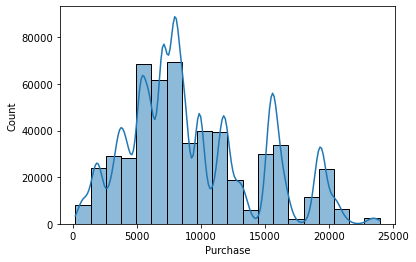

In [198]:
sns.histplot(df['Purchase'], bins=20, kde=True)

A normalidade da distribuição não é clara. 

Para chegar a uma conclusão robusta, uma análise mais profunda se fazer necessária. Podendo requerer o uso de testes de normalidade (Shapiro-Wilk, D'Agostino K^2 e Anderson Darling), análise outliers e manipulação dos dados de "Purchase".

Decidimos seguir com a alternativa 2.

#### 3. Análise da correlação entre as variáveis.

Observando a correlação com o uso do gráfico de Box Plot do Estado Civil x Valor e uma tabela de *group_by*.

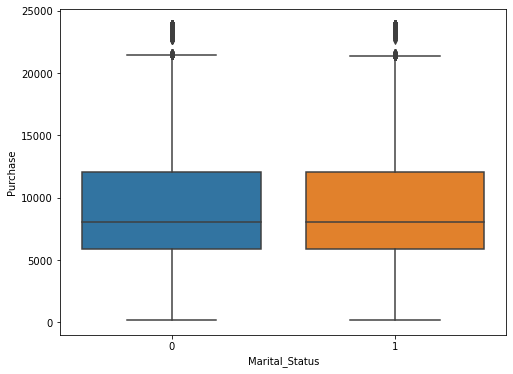

In [199]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Marital_Status', y='Purchase', data=df)

In [202]:
print('Média do valor da compra agrupada por estado civil:')
df[['Marital_Status', 'Purchase']].groupby(['Marital_Status'], as_index=False).mean()

Média do valor da compra agrupada por estado civil:


,Marital_Status,Purchase
0,0,9333.325467
1,1,9334.632681


#### 4. Conclusão da correlação.

O gráfico de Box Plot dos dois tipos de estado civil (0 e 1) são praticamente idênticos - assim como a média apresentada na tabela.

Podemos afirmar que **não há** correlação entre o estado civil e o valor gasto na compra.

### Influência de estado civil na categoria comprada

#### 1. Estudo das variáveis: "Marital_Status" e ("Product_Category_1", "Product_Category_2", "Product_Category_3")

A variável "Marital Status" é do tipo categórica nominal, representada de forma binária: "0" representa um estado civil e "1" representa outro.

As variáveis "Product_Category_X", apesar de serem representadas como inteiros, também são categóricas nominais.

#### 2. Estudo do método de análise.

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     537577 non-null  int64 
 1   Product_ID                  537577 non-null  object
 2   Purchase                    537577 non-null  int64 
 3   Gender                      537577 non-null  object
 4   Age                         537577 non-null  object
 5   Occupation                  537577 non-null  int64 
 6   City_Category               537577 non-null  object
 7   Stay_In_Current_City_Years  537577 non-null  object
 8   Marital_Status              537577 non-null  int64 
 9   Product_Category_1          537577 non-null  Int64 
 10  Product_Category_2          370591 non-null  Int64 
 11  Product_Category_3          164278 non-null  Int64 
dtypes: Int64(3), int64(4), object(5)
memory usage: 54.9+ MB


In [236]:
test = pd.crosstab(index=df['Product_Category_1'], columns=df['Marital_Status'])
test

Marital_Status,0,1
Product_Category_1,,
1,83230,55123
2,13946,9553
3,12158,7691
4,7072,4495
5,88411,60181
6,11986,8178
7,2004,1664
8,64484,47648
9,242,162


In [ ]:
df_product_category = df[['Marital_Status', 'Product_Category_1', 'Product_Category_3', 'Product_Category_3']]

## 🔍 Questão 13
Quais as variáveis que mais impactaram no valor da compra? Como você chegou a essa conclusão?

## 📥 Teste de Reprodutibilidade

Objetivo: checar se as soluções desenvolvidas para responder as questões 1-11 se aplicam a um Dataset com registros diferentes do original.

In [ ]:
# Preparando a caixa de ferramentas
import pandas as pd
import numpy as np

# Lendo e armazenando o Dataset
df_teste = pd.read_csv('data/df_teste.csv')

In [ ]:
# Questão 1
final_dataset_shape(df_teste)

In [ ]:
# Questão 2
woman_filter(df_teste)

In [ ]:
# Questão 3
unique_users(df_teste)

In [ ]:
# Questão 4
rows_containing_null(df_teste)

In [ ]:
# Questão 5
max_null(df_teste)

In [ ]:
# Questão 6
most_frequent(df_teste)

In [ ]:
# Questão 7
check_nulls_on_2_and_3(df_teste)

In [ ]:
# Questão 8
user_with_max_purchase(df_teste)

In [ ]:
# Questão 9
gender_with_max_purchase(df_teste)

In [ ]:
# Questão 10
purchased_category_by_client(df_teste)

In [ ]:
# Questão 11
normalize(df_teste)